In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from skimage import measure as meas, feature as feat
import cv2 as cv
from jupyterthemes import jtplot

C:\Users\MaryChrisGo\Anaconda3\lib\site-packages\numpy\core\__init__.py:29: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\MaryChrisGo\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.IPBC74C7KURV7CB2PKT5Z5FNR3SIBV4J.gfortran-win_amd64.dll
C:\Users\MaryChrisGo\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.TXA6YQSD3GCQQC22GEQ54J2UDCXDXHWN.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
train = 'C://Users//MaryChrisGo//Documents//1st Sem AY 2019-2020//App Physics 186//Act_12//'
banana = train + 'Banana//'
mango = train + 'Mango//'
orange = train + 'Orange//'


In [3]:
ban_a, ban_b, ban_ecc = [], [], []
man_a, man_b, man_ecc = [], [], []
ora_a, ora_b, ora_ecc = [], [], []
ass = [ban_a, man_a, ora_a]
bss = [ban_b, man_b, ora_b]
ecs = [ban_ecc, man_ecc, ora_ecc]
dirs = [banana, mango, orange]

for j in range(3):
    filenames = os.listdir(dirs[j])
    for i,f in enumerate(filenames):
        if i == 50:
            break 
        #eccentricity
        img = cv.imread(dirs[j] + f)
        img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
        thres, out = cv.threshold(img_gray, 127, 255, cv.THRESH_OTSU)
        out = (img_gray < thres).astype(float)
        img_label = meas.label(out)
        props = meas.regionprops(img_label)
        ecc = props[0]['eccentricity']

        # a* b*
        img_Lab = cv.cvtColor(img, cv.COLOR_BGR2Lab).astype(float)
        img_Lab /= img_Lab[:,:,0].max()
        img_L, img_a, img_b = cv.split(img_Lab)

        ass[j].append(img_a.mean())
        bss[j].append(img_b.mean())
        ecs[j].append(ecc)


C:\Users\MaryChrisGo\Anaconda3\lib\site-packages\skimage\measure\_regionprops.py:250: UserWarning: regionprops and image moments (including moments, normalized moments, central moments, and inertia tensor) of 2D images will change from xy coordinates to rc coordinates in version 0.16.
See http://scikit-image.org/docs/0.14.x/release_notes_and_installation.html#deprecations for details on how to avoid this message.
  warn(XY_TO_RC_DEPRECATION_MESSAGE)
C:\Users\MaryChrisGo\Anaconda3\lib\site-packages\skimage\measure\_regionprops.py:260: UserWarning: regionprops and image moments (including moments, normalized moments, central moments, and inertia tensor) of 2D images will change from xy coordinates to rc coordinates in version 0.16.
See http://scikit-image.org/docs/0.14.x/release_notes_and_installation.html#deprecations for details on how to avoid this message.
  warn(XY_TO_RC_DEPRECATION_MESSAGE)


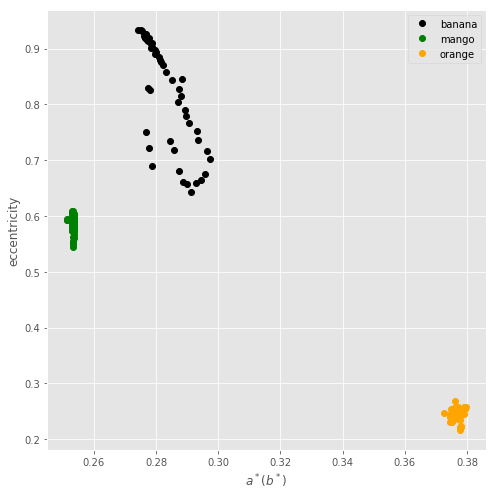

[0.28839511 0.27421662 0.27525857 0.27796927 0.27548811 0.27665427
 0.27646894 0.27623475 0.27729346 0.27682766 0.27648563 0.27771409
 0.27737453 0.27708894 0.27751618 0.2787604  0.27833777 0.2787265
 0.27831899 0.27965183 0.27998211 0.27958643 0.28085357 0.28131056
 0.28170495 0.28229551 0.28313763 0.28516368 0.28752009 0.28798774
 0.28704885 0.28925858 0.28962731 0.29049464 0.29302367 0.29360147
 0.29646488 0.2974998  0.29566739 0.2943785  0.29285862 0.29139864
 0.29000731 0.28873765 0.28733796 0.28590862 0.28437933 0.27690172
 0.277847   0.27875768]


In [15]:
banana_ab = np.multiply(ban_b, ban_a)
mango_ab = np.multiply(man_b, man_a)
orange_ab = np.multiply(ora_b, ora_a)

plt.style.use('ggplot')
plt.figure(figsize=(7, 7))
plt.plot(banana_ab, ban_ecc, 'o', color = 'black', label='banana')
plt.plot(mango_ab, man_ecc, 'o', color = 'green', label='mango')
plt.plot(orange_ab, ora_ecc, 'o', color = 'orange', label='orange')
plt.xlabel('$a^*(b^*)$')
plt.ylabel('eccentricity')
plt.legend()
plt.tight_layout()
plt.savefig('be_space.png', dpi=300, bbox_inches='tight')
plt.show()

print(banana_ab)

np.savetxt("banana_ab.csv", banana_ab, delimiter=",", fmt='%s')
np.savetxt("ban_ecc.csv", ban_ecc, delimiter=",", fmt='%s')
np.savetxt("mango_ab.csv", mango_ab, delimiter=",", fmt='%s')
np.savetxt("man_ecc.csv", man_ecc, delimiter=",", fmt='%s')
np.savetxt("orange_ab.csv", orange_ab, delimiter=",", fmt='%s')
np.savetxt("oran_ecc.csv", ora_ecc, delimiter=",", fmt='%s')

# Getting the perceptron

In [5]:
import os
import numpy as np
import numpy.random as rand
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from skimage import measure as meas, feature as feat
import cv2 as cv
from tqdm import tnrange, tqdm_notebook as tqdm
from jupyterthemes import jtplot

In [6]:
class MCPerceptron:
    def __init__(self,
                 input_shape, 
                 output_shape,
                 epochs,
                 activation='step',
                 lr=0.01,
                 eps=1e-6,
                 weight_initializer='random_uniform'):
        rand.seed(401)
        self.input_shape = input_shape
        self.output_shape = output_shape
        self.epochs = epochs
        self.activation = activation
        self.lr = lr
        self.eps = eps
        self.weight_initializer = weight_initializer
        
        if self.weight_initializer == 'random_uniform':
            self.W = rand.random(self.input_shape[1])
        elif self.weight_initializer == 'random_normal':
            self.W = rand.normal((0, 1, (self.input_shape[1])))

        if self.activation == 'step':
            self.g = lambda a: 1 if a >= 0 else -1

    def train(self, x, y):
        for count in tnrange(self.epochs, desc='Epoch'):
            for i in range(self.input_shape[0]):
                a = x[i].T.dot(self.W)
                z = self.g(a)

                res = y[i] - z
                dW = self.lr * res * x[i]
                self.W += dW
                
    def predict(self, x):
        y = np.zeros(x.shape[0])
        for i in range(x.shape[0]):
            f = x[i].dot(self.W)
            y[i] = self.g(f)
        return y 
    
    def get_weights(self):
        return self.W
    
    def get_biases(self):
        return self.x.T[0]

    def get_line_params(self):
        W = self.W
        A, B, C = W[1], W[2], -W[0]
        m = -A/B
        b = C/B
        return m, b
    
    def save_weights(self, filename):
        np.save(filename, self.W)
        
    def load_weights(self, filename):
        self.W = np.load(filename)

# Banana and Mango

In [7]:
x1 = np.hstack(([banana_ab, ban_ecc], [mango_ab, man_ecc])).T
x1 = np.column_stack((np.ones(x1.shape[0]), x1))
y = np.hstack((np.tile([1], 50), np.tile([-1], 50))).T

In [8]:
mcp = MCPerceptron(x1.shape, y.shape, epochs=100, lr=1e-1)
mcp.train(x1, y)
W = mcp.get_weights()

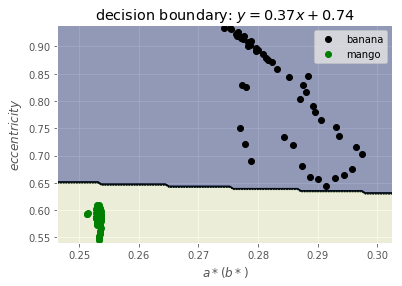

In [9]:
xmin, xmax = np.min((banana_ab, mango_ab))-5e-3, np.max((banana_ab, mango_ab))+5e-3
ymin, ymax = np.min((ban_ecc, man_ecc))-5e-3, np.max((ban_ecc, man_ecc))+5e-3
db_x = np.linspace(xmin, xmax, 100)
db_y = np.linspace(ymin, ymax, 100)
xx, yy = np.meshgrid(db_x, db_y)
Z = mcp.predict(np.c_[np.ones_like(xx.ravel()), xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap='YlGnBu', alpha=0.4)
plt.contour(xx, yy, Z, colors='k', linewidths=0.5)
plt.plot(banana_ab, ban_ecc, 'ko', label='banana')
plt.plot(mango_ab, man_ecc, 'go', label='mango')
#plt.plot(db_x, m*db_x+b, 'k-', lw=1)

decision_boundary = mcp.get_line_params()
decision_title = 'decision boundary: $y = %.2fx + %.2f$' if decision_boundary[1] >= 0 \
                 else 'decision boundary: $y = %.2fx - %.2f$'
plt.title(decision_title %tuple(np.abs(decision_boundary)))
plt.legend()
plt.xlabel('$a*(b*)$')
plt.ylabel('$eccentricity$')
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
# plt.savefig('ban-app_decision.png', dpi=300, bbox_inches='tight')
plt.show()


# Banana and Orange

In [10]:
x1 = np.hstack(([banana_ab, ban_ecc], [orange_ab, ora_ecc])).T
x1 = np.column_stack((np.ones(x1.shape[0]), x1))
y = np.hstack((np.tile([1], 50), np.tile([-1], 50))).T

mcp = MCPerceptron(x1.shape, y.shape, epochs=100, lr=1e-1)
mcp.train(x1, y)
W = mcp.get_weights()

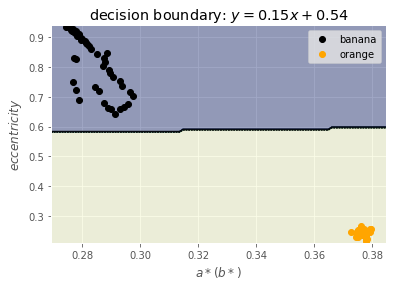

In [11]:
xmin, xmax = np.min((banana_ab, orange_ab))-5e-3, np.max((banana_ab, orange_ab))+5e-3
ymin, ymax = np.min((ban_ecc, ora_ecc))-5e-3, np.max((ban_ecc, ora_ecc))+5e-3
db_x = np.linspace(xmin, xmax, 100)
db_y = np.linspace(ymin, ymax, 100)
xx, yy = np.meshgrid(db_x, db_y)
Z = mcp.predict(np.c_[np.ones_like(xx.ravel()), xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap='YlGnBu', alpha=0.4)
plt.contour(xx, yy, Z, colors='k', linewidths=0.5)
plt.plot(banana_ab, ban_ecc, 'ko', label='banana')
plt.plot(orange_ab, ora_ecc, 'go', color = 'orange', label='orange')
#plt.plot(db_x, m*db_x+b, 'k-', lw=1)

decision_boundary = mcp.get_line_params()
decision_title = 'decision boundary: $y = %.2fx + %.2f$' if decision_boundary[1] >= 0 \
                 else 'decision boundary: $y = %.2fx - %.2f$'
plt.title(decision_title %tuple(np.abs(decision_boundary)))
plt.legend()
plt.xlabel('$a*(b*)$')
plt.ylabel('$eccentricity$')
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
# plt.savefig('ban-app_decision.png', dpi=300, bbox_inches='tight')
plt.show()


# Mango and orange

In [12]:
x1 = np.hstack(([mango_ab, man_ecc], [orange_ab, ora_ecc])).T
x1 = np.column_stack((np.ones(x1.shape[0]), x1))
y = np.hstack((np.tile([1], 50), np.tile([-1], 50))).T

mcp = MCPerceptron(x1.shape, y.shape, epochs=100, lr=1e-1)
mcp.train(x1, y)
W = mcp.get_weights()

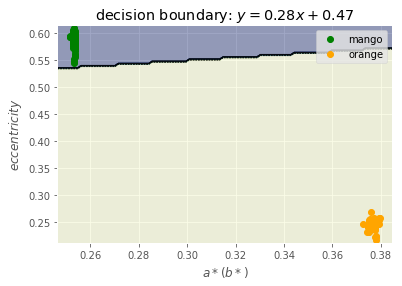

In [13]:
xmin, xmax = np.min((mango_ab, orange_ab))-5e-3, np.max((mango_ab, orange_ab))+5e-3
ymin, ymax = np.min((man_ecc, ora_ecc))-5e-3, np.max((man_ecc, ora_ecc))+5e-3
db_x = np.linspace(xmin, xmax, 100)
db_y = np.linspace(ymin, ymax, 100)
xx, yy = np.meshgrid(db_x, db_y)
Z = mcp.predict(np.c_[np.ones_like(xx.ravel()), xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, cmap='YlGnBu', alpha=0.4)
plt.contour(xx, yy, Z, colors='k', linewidths=0.5)
plt.plot(mango_ab, man_ecc, 'go', label='mango')
plt.plot(orange_ab, ora_ecc, 'o', color = 'orange', label='orange')
#plt.plot(db_x, m*db_x+b, 'k-', lw=1)

decision_boundary = mcp.get_line_params()
decision_title = 'decision boundary: $y = %.2fx + %.2f$' if decision_boundary[1] >= 0 \
                 else 'decision boundary: $y = %.2fx - %.2f$'
plt.title(decision_title %tuple(np.abs(decision_boundary)))
plt.legend()
plt.xlabel('$a*(b*)$')
plt.ylabel('$eccentricity$')
plt.xlim(xmin, xmax)
plt.ylim(ymin, ymax)
# plt.savefig('ban-app_decision.png', dpi=300, bbox_inches='tight')
plt.show()
